MPG Auto Dataset Problem

By: Kiran Kumar KV
  
For: MTech in AI

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv"
df = pd.read_csv(url)

# Preview
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [23]:
# Shape of the dataset
print("Shape:", df.shape)

# Column names and data types
print("Data types:\n", df.dtypes)

# Missing values
print("Missing values:\n", df.isnull().sum())

# Summary stats for mpg
print("MPG - Mean:", df['mpg'].mean())
print("MPG - Median:", df['mpg'].median())
print("MPG - Std Dev:", df['mpg'].std())

# Cars with highest and lowest MPG
print("Highest MPG:\n", df[df['mpg'] == df['mpg'].max()])
print("Lowest MPG:\n", df[df['mpg'] == df['mpg'].min()])

# Average MPG by cylinders
print("Average MPG by Cylinders:\n", df.groupby('cylinders')['mpg'].mean())

# Average MPG by origin
print("Average MPG by Origin:\n", df.groupby('origin')['mpg'].mean())


Shape: (398, 9)
Data types:
 mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object
Missing values:
 mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64
MPG - Mean: 23.514572864321607
MPG - Median: 23.0
MPG - Std Dev: 7.815984312565782
Highest MPG:
       mpg  cylinders  displacement  horsepower  weight  acceleration  \
322  46.6          4          86.0        65.0    2110          17.9   

     model_year origin       name  
322          80  japan  mazda glc  
Lowest MPG:
     mpg  cylinders  displacement  horsepower  weight  acceleration  \
28  9.0          8         304.0       193.0    4732          18.5   

    model_year origin      name  
28          70    usa  hi 1200d  
Average MPG b

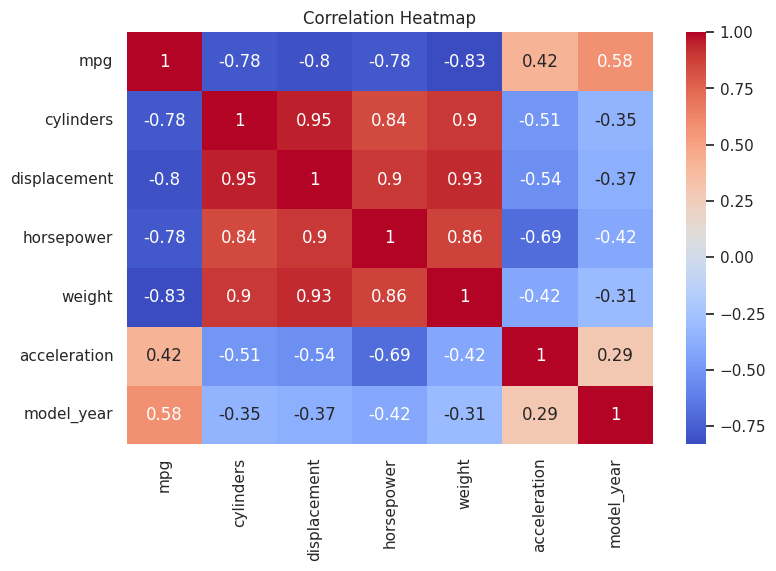

In [24]:
sns.set(style="whitegrid")

# Scatter plot
sns.lmplot(x='horsepower', y='mpg', data=df, aspect=1.5)
plt.title("MPG vs Horsepower")

# Histogram
df['mpg'].hist(bins=20, edgecolor='black')
plt.title("MPG Distribution")
plt.xlabel("MPG")
plt.ylabel("Frequency")

# Boxplot: MPG vs Cylinders
sns.boxplot(x='cylinders', y='mpg', data=df)
plt.title("MPG by Number of Cylinders")

# Correlation heatmap
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [25]:
# Replace origin values
df['origin'] = df['origin'].replace({1: 'USA', 2: 'Europe', 3: 'Japan'})

# One-hot encoding for origin
df = pd.get_dummies(df, columns=['origin'], drop_first=True)

# Remove outliers using Z-score (for mpg and horsepower)
#from scipy.stats import zscore
#z_scores = zscore(df[['mpg', 'horsepower']])
#df = df[(np.abs(z_scores) < 3).all(axis=1)]

# Feature Engineering: Power-to-weight ratio
df['power_to_weight'] = df['horsepower'] / df['weight']

# Check correlation
print("Correlation with MPG:\n", df[['mpg', 'power_to_weight']].corr())


Correlation with MPG:
                       mpg  power_to_weight
mpg              1.000000        -0.269699
power_to_weight -0.269699         1.000000


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Drop rows with missing horsepower
df_model = df.dropna(subset=['horsepower'])

# Features and label
features = ['horsepower', 'weight', 'displacement']
X = df_model[features]
y = df_model['mpg']

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Coefficients
coeff_df = pd.DataFrame(model.coef_, index=features, columns=["Coefficient"])
print(coeff_df)


R2 Score: 0.6470668946730966
MSE: 18.013911540541997
              Coefficient
horsepower      -0.043286
weight          -0.005209
displacement    -0.008812


In [27]:
!pip install pandasql

In [28]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

# 1. Top 5 most fuel-efficient cars
q1 = "SELECT name, mpg FROM df ORDER BY mpg DESC LIMIT 5"
print(pysqldf(q1))

# 2. Count of cars by cylinders
q2 = "SELECT cylinders, COUNT(*) as count FROM df GROUP BY cylinders"
print(pysqldf(q2))

# 3. Average MPG per origin
q3 = """
SELECT
    CASE
        WHEN origin_usa = 1 THEN 'USA'
        WHEN origin_japan = 1 THEN 'Japan'
        ELSE 'Europe' -- If not USA and not Japan, it must be Europe because of drop_first=True
    END as origin,
    AVG(mpg) as avg_mpg
FROM df
GROUP BY origin_usa, origin_japan
"""
print(pysqldf(q3))

                   name   mpg
0             mazda glc  46.6
1   honda civic 1500 gl  44.6
2  vw rabbit c (diesel)  44.3
3             vw pickup  44.0
4    vw dasher (diesel)  43.4
   cylinders  count
0          3      4
1          4    204
2          5      3
3          6     84
4          8    103
   origin    avg_mpg
0  Europe  27.891429
1   Japan  30.450633
2     USA  20.083534


In [29]:
# 4: Find the Average MPG for each cylinder
q4 = "SELECT cylinders, AVG(mpg) as avg_mpg FROM df GROUP BY cylinders"
print(pysqldf(q4))

   cylinders    avg_mpg
0          3  20.550000
1          4  29.286765
2          5  27.366667
3          6  19.985714
4          8  14.963107


In [30]:
#5: Find the Maximum Average MPG for each cylinder
q5 = """
SELECT
    cylinders,AVG(mpg) as avg_mpg
    FROM df
    GROUP BY cylinders
    ORDER BY avg_mpg DESC
    LIMIT 1
    """

print(pysqldf(q5))

   cylinders    avg_mpg
0          4  29.286765


In [31]:
# Example query to label origin with numerical values using SQL
q_label_origin = """
SELECT
    name,
    mpg,
    CASE
        WHEN origin_usa = 1 THEN 1  -- Assuming 1 for USA
        WHEN origin_japan = 1 THEN 2 -- Assuming 2 for Japan
        ELSE 3 -- Assuming 3 for Europe (since drop_first=True was used)
    END as origin_labeled
FROM df
"""

labeled_origin_df = pysqldf(q_label_origin)
print(labeled_origin_df.head())

                        name   mpg  origin_labeled
0  chevrolet chevelle malibu  18.0               1
1          buick skylark 320  15.0               1
2         plymouth satellite  18.0               1
3              amc rebel sst  16.0               1
4                ford torino  17.0               1


In [32]:
#6 : Average MPG based on Origin
q6 = "SELECT origin_labeled, AVG(mpg) FROM labeled_origin_df GROUP BY origin_labeled"
print(pysqldf(q6))

   origin_labeled   AVG(mpg)
0               1  20.083534
1               2  30.450633
2               3  27.891429


In [33]:
#7 : Count number of NULL values in Horsepower
q7 = "SELECT COUNT(mpg) FROM df WHERE horsepower  IS NULL"
print(pysqldf(q7))

   COUNT(mpg)
0           6


In [34]:
q8 = "SELECT COUNT(DISTINCT name) FROM df "
print(pysqldf(q8))

   COUNT(DISTINCT name)
0                   305


In [35]:
#cars count w.r.t number of cylinders
q9 = "SELECT cylinders, COUNT(*) FROM df GROUP BY cylinders"
print(pysqldf(q9))

   cylinders  COUNT(*)
0          3         4
1          4       204
2          5         3
3          6        84
4          8       103


In [36]:
q_unique_names = "SELECT DISTINCT name FROM df"
print(pysqldf(q_unique_names))

                          name
0    chevrolet chevelle malibu
1            buick skylark 320
2           plymouth satellite
3                amc rebel sst
4                  ford torino
..                         ...
300            ford mustang gl
301                  vw pickup
302              dodge rampage
303                ford ranger
304                 chevy s-10

[305 rows x 1 columns]


In [38]:
#cars made by Toyota
q10 = "SELECT * FROM df WHERE name LIKE 'Toyota%'"
print(pysqldf(q10))

     mpg  cylinders  displacement  horsepower  weight  acceleration  \
0   24.0          4         113.0        95.0    2372          15.0   
1   25.0          4         113.0        95.0    2228          14.0   
2   31.0          4          71.0        65.0    1773          19.0   
3   24.0          4         113.0        95.0    2278          15.5   
4   27.0          4          97.0        88.0    2100          16.5   
5   20.0          4          97.0        88.0    2279          19.0   
6   20.0          6         156.0       122.0    2807          13.5   
7   32.0          4          71.0        65.0    1836          21.0   
8   31.0          4          76.0        52.0    1649          16.5   
9   29.0          4          97.0        75.0    2171          16.0   
10  24.0          4         134.0        96.0    2702          13.5   
11  28.0          4          97.0        75.0    2155          16.4   
12  19.0          6         156.0       108.0    2930          15.5   
13  26

In [43]:
#q11: Delete the last threee rows of the table
q11 = """
DELETE FROM df
WHERE rowid >= (SELECT MAX(rowid) - 3 FROM df)
"""
pysqldf(q11)
print(df)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year                       name  origin_japan  origin_usa  \
0            70  chevrolet chevelle malibu         False       

In [48]:
#q12: Find the Null values in the table
q12 = "SELECT * FROM df WHERE power_to_weight IS NULL"
print(pysqldf(q12))

    mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  25.0          4          98.0       None    2046          19.0          71   
1  21.0          6         200.0       None    2875          17.0          74   
2  40.9          4          85.0       None    1835          17.3          80   
3  23.6          4         140.0       None    2905          14.3          80   
4  34.5          4         100.0       None    2320          15.8          81   
5  23.0          4         151.0       None    3035          20.5          82   

                   name  origin_japan  origin_usa power_to_weight  
0            ford pinto             0           1            None  
1         ford maverick             0           1            None  
2  renault lecar deluxe             0           0            None  
3    ford mustang cobra             0           1            None  
4           renault 18i             0           0            None  
5        amc concord dl 